<a href="https://colab.research.google.com/github/shweta7122/Recommender/blob/main/Product_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRODUCT RECOMMENDER SYSTEM - CSDA 1040**

### **Context: Building a Product Recommender System**

Everyday millions of products get sold online. It has been established that products recommended to users based on popularity and other metrics on e-commerce websites leads to enhanced user experience. Most popular e-commerce website boost their average order value and also increases revenues significantly thereby improves conversion. Recommender systems are among the most visible and successful applications of Articial Intelligence and Machine Learning technology in practice. Nowadays, such systems accompany us
through our daily online lives — for example on e-commerce sites, on media streaming platforms, or in social networks. They help us by suggesting things that are assumed to be of interest to us and which we are correspondingly likely to inspect, consume, or purchase.

**Data Source: Source** - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics dataset.
Learning Outcomes

**BUSINESS PROBLEM:**

As a business that is invested in online sales, it has become imperative to build a product recommender system. Customers that are accustomed to online shopping have come to expect a level of personalization and recommendation to enhance their experience and might move away to websites that are more perceptive to their needs.

a) Helps User find the right type of product more easily which leads to better levels of engagement

b) Also helps the business use cross-sell, upsell and entice customers which leads to increased sales

c) Leads to a personalized experience 


**ANALYTICAL OBJECTIVE**

Build a Recommender Model that recommends products to users either based on popularity or ratings to increase customer engagement and drive sales. 

There are different types of recommender models based on popularity, user based, content based recommendation, collaborative filtering.



In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None



In [ ]:
# Loading Data with headers and display
electronics_data = pd.read_csv("ratings_Electronics (1).csv", names=['userId', 'productId','Rating','timestamp'])
electronics_data = electronics_data.iloc[1:]
electronics_data.head()

,userId,productId,Rating,timestamp
1,A2CX7LUOHB2NDG,0321732944,5.0000000,1341100800.0000000
2,A2NWSAGRHCP8N5,0439886341,1.0000000,1367193600.0000000
3,A2WNBOD3WNDNKT,0439886341,3.0000000,1374451200.0000000
4,A1GI0U4ZRJA8WN,0439886341,1.0000000,1334707200.0000000
5,A1QGNMC6O1VW39,0511189877,5.0000000,1397433600.0000000


**DATA EXPLORATION**

In [ ]:
# Datatypes

electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662798 entries, 1 to 5662798
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  float64
dtypes: float64(2), object(2)
memory usage: 172.8+ MB


In [ ]:
# Shape of the data
electronics_data.shape

(5662798, 4)

In [ ]:
# More on our data
electronics_data.describe()['Rating'].T

count   5662797.0000000
mean          3.9970031
std           1.3911495
min           1.0000000
25%           3.0000000
50%           5.0000000
75%           5.0000000
max           5.0000000
Name: Rating, dtype: float64

In [ ]:
# Checking for any null or missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    1
Rating       1
timestamp    1
dtype: int64


In [ ]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


**DATA DISTRIBUTION**

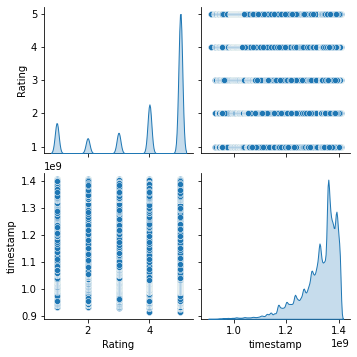

In [ ]:

sns.pairplot(electronics_data, diag_kind= 'kde')


In [ ]:
# Checking the distribution of the ratings
rating_counts = pd.DataFrame(electronics_data['Rating'].value_counts()).reset_index()
rating_counts.columns = ['Labels', 'Ratings']
rating_counts

,Labels,Ratings
0,5.0000000,3122016
1,4.0000000,1079290
2,1.0000000,671624
3,3.0000000,455619
4,2.0000000,334248


Text(0.5, 0, 'Rating Distribution')

Text(0, 0.5, 'Count')

([<matplotlib.patches.Wedge at 0x7fc9a4c96e50>,
 [Text(-1.1788923556547888, 0.22408215854615227, '5.0'),
  Text(0.595590692513461, -0.9248090219020012, '4.0'),
  Text(1.1995537583076403, -0.0327227891539711, '1.0'),
  Text(0.9090496599490892, 0.619377684249639, '3.0'),
  Text(0.560351081427255, 0.9465762861720687, '2.0')],
 [Text(-0.6876872074652934, 0.13071459248525547, '55.13%'),
  Text(0.32486765046188776, -0.5044412846738188, '19.06%'),
  Text(0.6997396923461235, -0.01908829367314981, '11.86%'),
  Text(0.49584526906313947, 0.33784237322707583, '8.05%'),
  Text(0.3056460444148663, 0.5163143379120374, '5.90%')])

(-1.2182434569608511,
 1.2135223459526252,
 -1.1066105187905693,
 1.1289158276533633)

Text(0.5, 1.0, 'Rating Ratio')

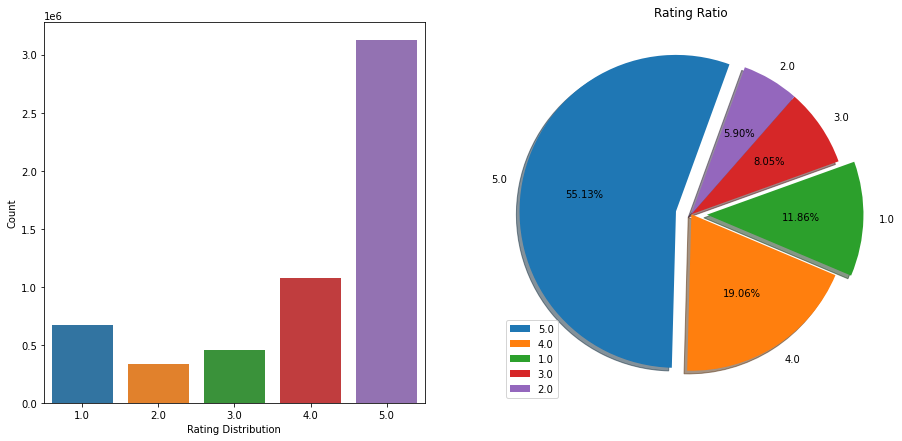

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.countplot(electronics_data['Rating'], ax=ax1)
ax1.set_xlabel('Rating Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)


explode = (0.1, 0, 0.1, 0, 0)
ax2.pie(rating_counts["Ratings"], explode=explode, labels=rating_counts.Labels, autopct='%1.2f%%',
        shadow=True, startangle=70)
ax2.axis('equal')
plt.title("Rating Ratio")
plt.legend(rating_counts.Labels, loc=3)
plt.show()

**OBSERVATIONS:**

We can see that most customers provide a rating of "5". Very few customers have given a rating of "2". 

From the barplot and pia chart we can clearly see that approx 55% of data have 5 rating followed by 4(approx 19%). Least number of people have given 2 rating. 

Either most products are liked by customers or there is more to investigate such as dropping of reviews by bots or promotional events. 

Are customers asked for feedback, if they give a lower rating thus making it easier to go with a rating of "5"?

**UNIQUE USERS AND NUMBER OF UNIQUE PRODUCTS**

In [ ]:
electronics_data.productId = electronics_data.productId.fillna('')

In [ ]:
print("\nTotal no of Ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of Products  :", len(np.unique(electronics_data.productId)))


Total no of Ratings : 5662798
Total No of Users   : 3250519
Total No of Products  : 310624


In [ ]:
#Dropping the Timestamp Column and it is not needed for our analysis

electronics_data.drop(['timestamp'], axis=1,inplace=True)

**POPULARITY BASED RECOMMENDER**

Popularity based recommendation system uses the most frequently sold items to drive sales. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

This is good for new users when data is not available on their preferences.


In [ ]:
#  Taking Subset of users who have given 50 or more number of ratings
users_counts = electronics_data['userId'].value_counts().rename('users_counts')
users_data   = electronics_data.merge(users_counts.to_frame(),
                                left_on='userId',
                                right_index=True)

In [ ]:
subset_df = users_data[users_data.users_counts >= 50]
subset_df.tail()

# Customers who have rated more than 50 products. These customers seem like they are regular buyers and provide regular feedback.

,userId,productId,Rating,users_counts
5303809,A34BZM6S9L7QI4,B0064R9H2A,5.0000000,58
5428704,A34BZM6S9L7QI4,B006LVZDSQ,5.0000000,58
5587943,A34BZM6S9L7QI4,B00746YHV6,5.0000000,58
5595111,A34BZM6S9L7QI4,B0074BW614,5.0000000,58
5614392,A34BZM6S9L7QI4,B0074FGNDC,5.0000000,58


**Resolving the "Grey Sheep" Problem:**

"Recommender Systems have been successfully applied to alleviate the information overload problem and assist the process of decision making. Collaborative filtering, as one of the most popular recommendation algorithms, has been fully explored and developed in the past two decades. However, one of the challenges in collaborative filtering, the problem of "Grey Sheep" user, is still under investigation. "Grey Sheep" users is a group of the users who have special tastes and they may neither agree nor disagree with the majority of the users. The identification of them becomes a challenge in collaborative filtering, since they may introduce difficulties to produce accurate collaborative recommendations" (Source:https://dl.acm.org/doi/abs/10.1145/3125649.3125651)

In [ ]:
# We resolve the "Grey Sheep" Problem by taking a subset of products that have 10 or more ratings. 
# This will ensure that these are commonly purchased and rated.
product_rating_counts = subset_df['productId'].value_counts().rename('product_rating_counts')
product_rating_data   = subset_df.merge(product_rating_counts.to_frame(),
                                left_on='productId',
                                right_index=True)
product_rating_data = product_rating_data[product_rating_data.product_rating_counts >= 10]
product_rating_data.tail()


,userId,productId,Rating,users_counts,product_rating_counts
2850789,A4D5B7Q8A7PA6,B002TLTE7I,5.0000000,72,12
2850750,A2503LT8PZIHAD,B002TLTE7I,4.0000000,65,12
2850765,ABIVKBMSIPEDY,B002TLTE7I,5.0000000,84,12
2850791,A20L63B48RPSOH,B002TLTE7I,3.0000000,59,12
2850788,A2KHG3JOFXQ4CE,B002TLTE7I,3.0000000,50,12


Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

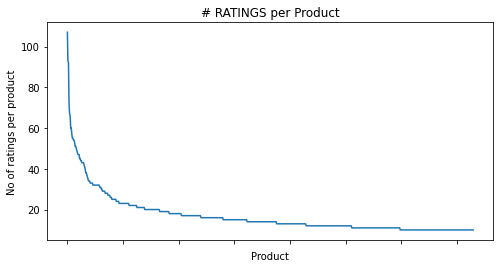

In [ ]:
no_of_ratings_per_product = product_rating_data.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [ ]:
#Average rating of the product 

product_rating_data.groupby('productId')['Rating'].mean().head()

productId
B00001WRSJ   4.3000000
B00004SB92   4.3333333
B00004T8R2   4.4375000
B00004WCIC   4.3076923
B00004XOM3   4.7000000
Name: Rating, dtype: float64

In [ ]:
product_rating_data.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B000FQ2JLW   5.0000000
B0052SCU8U   5.0000000
B0033PRWSW   5.0000000
B000067RT6   5.0000000
B000I1X3W8   5.0000000
Name: Rating, dtype: float64

In [ ]:
#Top Products with maximum ratings of "5"

product_rating_data.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B003ES5ZUU    107
B002R5AM7C     93
B000N99BBC     92
B002V88HFE     72
B002WE6D44     67
Name: Rating, dtype: int64

In [ ]:
ratings_mean_count = pd.DataFrame(product_rating_data.groupby('productId')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(product_rating_data.groupby('productId')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
productId,,
B00001WRSJ,4.3000000,10
B00004SB92,4.3333333,18
B00004T8R2,4.4375000,16
B00004WCIC,4.3076923,13
B00004XOM3,4.7000000,10


<Figure size 576x432 with 0 Axes>

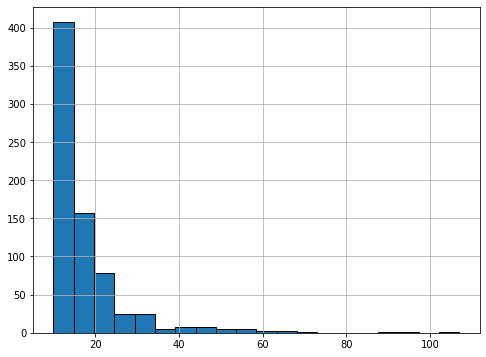

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=20)

**OBSERVATION:**

We see that the most customers have reviewed the top 25 products. This leads us to the conclusion that this seems to be the most popular product.

<Figure size 576x432 with 0 Axes>

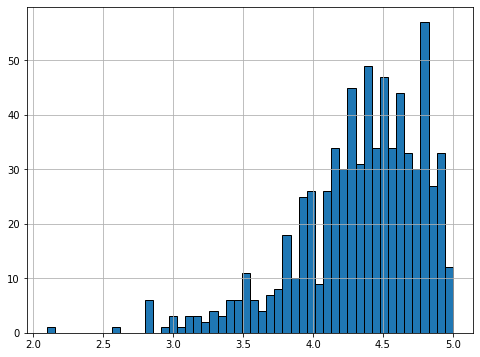

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

**OBSERVATION**

Here we see that the items with most ratings seem to be popular and consistently score between Rating "4" to Rating "5"

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

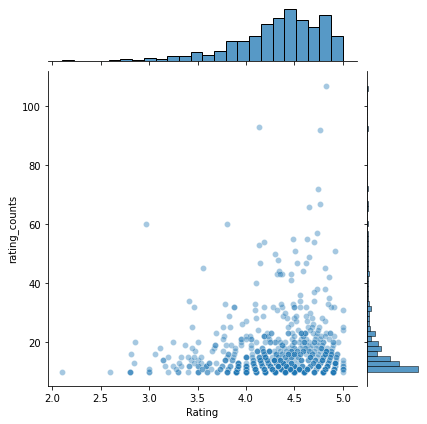

In [ ]:
# Lets see the data on a jointplot
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

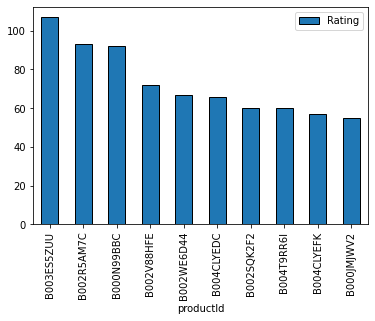

In [ ]:
popular_products = pd.DataFrame(product_rating_data.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10).plot(kind = "bar")

The above chart shows us the Top 10 Recommended Products based on popularity

**DATA PREPARATION**



In [ ]:
df1=product_rating_data.copy()
df2 = df1.drop(['users_counts', 'product_rating_counts'], axis=1)

In [ ]:
df2.head()

,userId,productId,Rating
169871,AT09WGFUM934H,B00006B7DA,4.0000000
170269,A32HSNCNPRUMTR,B00006B7DA,5.0000000
170243,A30X750M8V1XXW,B00006B7DA,5.0000000
169834,A680RUE1FDO8B,B00006B7DA,5.0000000
170363,A1F9Z42CFF9IAY,B00006B7DA,5.0000000


In [ ]:
!pip3 install numpy
!pip3 install scikit-surprise

     |████████████████████████████████| 11.8 MB 5.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619418 sha256=88bde8dc26cb3f3c11af02bd2a56c1a84e048f67e098eaede95ed874cc08ec36
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from collections import defaultdict
from surprise import KNNWithMeans
from surprise import SVD, SVDpp
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

import time

In [ ]:
# Spliting the data randomly into train and test dataset. (Split it in 70/30 ratio)

k = 5 
#(To Get top - K ( K = 5) recommendations)
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(df2[['userId', 'productId', 'Rating']], reader)
trainset, testset = train_test_split(surprise_data, test_size=.30, random_state=7)

**DATA MODELING**

Here we will try two types of Popularity Recommender Models - 

1) Using Mean Product Rating

2) Using Ranking Based Rating

In [ ]:
# 1) Using Mean Product Rating
df2.groupby('productId')['Rating'].mean().head()

productId
B00001WRSJ   4.3000000
B00004SB92   4.3333333
B00004T8R2   4.4375000
B00004WCIC   4.3076923
B00004XOM3   4.7000000
Name: Rating, dtype: float64

In [ ]:
df2.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B000FQ2JLW   5.0000000
B0052SCU8U   5.0000000
B0033PRWSW   5.0000000
B000067RT6   5.0000000
B000I1X3W8   5.0000000
Name: Rating, dtype: float64

In [ ]:
prod_rating_count = pd.DataFrame(df2.groupby('productId')['Rating'].mean().sort_values(ascending=False))
prod_rating_count['prod_rating_count'] = pd.DataFrame(df2.groupby('productId')['Rating'].count())
prod_rating_count.head(k)

,Rating,prod_rating_count
productId,,
B000FQ2JLW,5.0000000,12
B0052SCU8U,5.0000000,31
B0033PRWSW,5.0000000,11
B000067RT6,5.0000000,24
B000I1X3W8,5.0000000,13


In [ ]:
basic_poplurity_model = prod_rating_count.sort_values(by=['prod_rating_count'], ascending=False)
basic_poplurity_model.head(k)

,Rating,prod_rating_count
productId,,
B003ES5ZUU,4.8224299,107
B002R5AM7C,4.1397849,93
B000N99BBC,4.7608696,92
B002V88HFE,4.7500000,72
B002WE6D44,4.7611940,67


These are the TOP 5 popular products that would be recommended based on Mean Product Rating

2) Ranking Based Rating

In [ ]:
df2_grouped = df2.groupby('productId').agg({'userId': 'count'}).reset_index()
df2_grouped.rename(columns = {'userId': 'Score'},inplace=True)
df2_grouped.head()

,productId,Score
0,B00001WRSJ,10
1,B00004SB92,18
2,B00004T8R2,16
3,B00004WCIC,13
4,B00004XOM3,10


In [ ]:
#Sort the products on recommendation score 
df2_sort = df2_grouped.sort_values(['Score', 'productId'], ascending = [0,1]) 
      
#Generate a product rank based upon score 
df2_sort['Rank'] = df2_sort['Score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = df2_sort.head(k) 
popularity_recommendations 

,productId,Score,Rank
459,B003ES5ZUU,107,1.0000000
394,B002R5AM7C,93,2.0000000
125,B000N99BBC,92,3.0000000
410,B002V88HFE,72,4.0000000
426,B002WE6D44,67,5.0000000


**MODEL DEPLOYMENT AND EVALUATION**

In [ ]:
# Using popularity based recommender model to make predictions and find recommendations for random list of users with inferences

import warnings
warnings.filterwarnings('ignore')
def recommend(userId):     
    user_recommendations = popularity_recommendations 
          
    #Adding user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = userId 
      
    #Bringing user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [ ]:
find_recom = [15,121,55,230,477]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

     userID   productId  Score      Rank
459      15  B003ES5ZUU    107 1.0000000
394      15  B002R5AM7C     93 2.0000000
125      15  B000N99BBC     92 3.0000000
410      15  B002V88HFE     72 4.0000000
426      15  B002WE6D44     67 5.0000000


Here is the recommendation for the userId: 121

     userID   productId  Score      Rank
459     121  B003ES5ZUU    107 1.0000000
394     121  B002R5AM7C     93 2.0000000
125     121  B000N99BBC     92 3.0000000
410     121  B002V88HFE     72 4.0000000
426     121  B002WE6D44     67 5.0000000


Here is the recommendation for the userId: 55

     userID   productId  Score      Rank
459      55  B003ES5ZUU    107 1.0000000
394      55  B002R5AM7C     93 2.0000000
125      55  B000N99BBC     92 3.0000000
410      55  B002V88HFE     72 4.0000000
426      55  B002WE6D44     67 5.0000000


Here is the recommendation for the userId: 230

     userID   productId  Score      Rank
459     230  B003ES5ZUU  

In [ ]:
import pickle
pickle.dump(popularity_recommendations ,open('mostpopular.pkl','wb'))

**NOTE:**

Since this is a popularity-based recommender model, recommendations remain the same for all users. We predict the products based on the popularity. It is not personalized to the user.

**COLLABORATIVE FILTER MODELLING**

We will use the SVD and KNN based modeling to find the closest product to the chosen product and also closest User Profile to the current User Profile


**SVD**

In [ ]:
# Creating Model using best parameters
svd_model = SVD(n_epochs=20, lr_all=0.005, reg_all=0.2)

# Training the algorithm on the trainset
svd_model.fit(trainset)


# Predicting for test set
predictions_svd = svd_model.test(testset)

# Evaluating RMSE, MAE of algorithm SVD on 5 split(s) by cross validation
svd_cv = cross_validate(svd_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
svd_df = pd.DataFrame.from_dict(svd_cv)
svd_described = svd_df.describe()
cv_results = pd.DataFrame([['SVD', svd_described['test_rmse']['mean'], svd_described['test_mae']['mean'], 
                           svd_described['fit_time']['mean'], svd_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])
# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(predictions_svd, verbose=True)
print("=====================================================================")
cv_results

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8888  0.9053  0.8872  0.8739  0.8949  0.8900  0.0103  
MAE (testset)     0.6542  0.6575  0.6549  0.6407  0.6537  0.6522  0.0059  
Fit time          0.54    0.53    0.52    0.53    0.52    0.53    0.01    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


==================== Model Evaluation ===============================
RMSE: 0.8925


0.892473621981048

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976


**Comment:** Here we can see that the RMSE of testset and complete dataset found from cross_validation is almost same and it seems like our model is performing well on trainset and testset.

**SVD++**

In [ ]:
# Creating Model using best parameters
svdpp_model = SVDpp(n_epochs=25, lr_all=0.01, reg_all=0.4)

# Training the algorithm on the trainset
svdpp_model.fit(trainset)


# Predicting for test set
predictions_svdpp = svdpp_model.test(testset)

# Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s) by cross validation
svdpp_cv = cross_validate(svdpp_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
svdpp_df = pd.DataFrame.from_dict(svdpp_cv)
svdpp_described = svdpp_df.describe()
svdpp_cv_results = pd.DataFrame([['SVD++', svdpp_described['test_rmse']['mean'], svdpp_described['test_mae']['mean'], 
                           svdpp_described['fit_time']['mean'], svdpp_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(svdpp_cv_results, ignore_index=True)
# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(predictions_svdpp, verbose=True)
print("=====================================================================")
cv_results

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8799  0.9002  0.8955  0.8608  0.8975  0.8868  0.0148  
MAE (testset)     0.6416  0.6474  0.6597  0.6241  0.6493  0.6444  0.0117  
Fit time          3.93    3.85    3.82    3.81    3.81    3.84    0.05    
Test time         0.07    0.10    0.13    0.11    0.11    0.10    0.02    


==================== Model Evaluation ===============================
RMSE: 0.8862


0.8862035858821745

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976
1,SVD++,0.8867699,0.6444038,3.8447493,0.1043778


**KNN BASIC**

In [ ]:
knn_param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [15, 20, 25, 30, 40, 50, 60],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline']}
              }

knnbasic_gs = GridSearchCV(KNNBasic, knn_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs = GridSearchCV(KNNWithMeans, knn_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnz_gs     = GridSearchCV(KNNWithZScore, knn_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)


knnbasic_gs.fit(surprise_data)
knnmeans_gs.fit(surprise_data)
knnz_gs.fit(surprise_data)

# best RMSE score
print(knnbasic_gs.best_score['rmse'])
print(knnmeans_gs.best_score['rmse'])
print(knnz_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(knnbasic_gs.best_params['rmse'])
print(knnmeans_gs.best_params['rmse'])
print(knnz_gs.best_params['rmse'])



0.9905989729265148
0.9526177506572051
0.9564671956353912
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 25, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 60, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 40, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [ ]:
# Creating Model using best parameters
knnBasic_model = KNNBasic(k=50, sim_options={'name': 'cosine', 'user_based': False})

# Training the algorithm on the trainset
knnBasic_model.fit(trainset)

# Predicting for test set
prediction_knnBasic = knnBasic_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s)
knnBasic_cv = cross_validate(knnBasic_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnBasic_df = pd.DataFrame.from_dict(knnBasic_cv)
knnBasic_described = knnBasic_df.describe()
knnBasic_cv_results = pd.DataFrame([['KNNBasic', knnBasic_described['test_rmse']['mean'], knnBasic_described['test_mae']['mean'], knnBasic_described['fit_time']['mean'], knnBasic_described['test_time']['mean']]],
columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])
cv_results = cv_results.append(knnBasic_cv_results, ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnBasic, verbose=True)
print("=====================================================================")
cv_results


Computing the cosine similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0318  1.0148  0.9921  0.9890  1.0106  1.0077  0.0157  
MAE (testset)     0.7147  0.7033  0.6839  0.6893  0.6946  0.6972  0.0108  
Fit time          0.10    0.10    0.09    0.10    0.10    0.10    0.00    
Test time         0.07    0.08    0.07    0.08    0.08    0.07    0.00    


==================== Model Evaluation ===============================
RMSE: 1.0400


1.0399722285962043

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976
1,SVD++,0.8867699,0.6444038,3.8447493,0.1043778
2,KNNBasic,1.0076508,0.6971592,0.0968201,0.0740165


**KNNWithZScore**

In [ ]:
# Creating Model using best parameters
knnZscore_model = KNNWithZScore(k=60, sim_options={'name': 'cosine', 'user_based': False})

# Training the algorithm on the trainset
knnZscore_model.fit(trainset)

# Predicting for testset
prediction_knnZscore = knnZscore_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s)
knnZscore_cv = cross_validate(knnZscore_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnZscore_df = pd.DataFrame.from_dict(knnZscore_cv)
knnZscore_described = knnZscore_df.describe()
knnZscore_cv_results = pd.DataFrame([['KNNWithZScore', knnZscore_described['test_rmse']['mean'], knnZscore_described['test_mae']['mean'], 
                           knnZscore_described['fit_time']['mean'], knnZscore_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnZscore_cv_results, ignore_index=True)
# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnZscore, verbose=True)
print("=====================================================================")
cv_results

Computing the cosine similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9621  0.9745  0.9467  0.9634  0.9836  0.9660  0.0125  
MAE (testset)     0.6535  0.6687  0.6436  0.6551  0.6742  0.6590  0.0110  
Fit time          0.13    0.13    0.14    0.14    0.13    0.13    0.00    
Test time         0.09    0.09    0.09    0.09    0.09    0.09    0.00    


==================== Model Evaluation ===============================
RMSE: 0.9841


0.9841092077020233

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976
1,SVD++,0.8867699,0.6444038,3.8447493,0.1043778
2,KNNBasic,1.0076508,0.6971592,0.0968201,0.0740165
3,KNNWithZScore,0.9660434,0.6590307,0.1323882,0.0872754


**KNNWithMeans User-User**

In [ ]:
# Creating Model using best parameters
knnMeansUU_model = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': True})

# Training the algorithm on the trainset
knnMeansUU_model.fit(trainset)

# Predicting for testset
prediction_knnMeansUU = knnMeansUU_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNWithMeans User-User on 5 split(s)
knnMeansUU_cv = cross_validate(knnMeansUU_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnMeansUU_df = pd.DataFrame.from_dict(knnMeansUU_cv)
knnMeansUU_described = knnMeansUU_df.describe()
knnMeansUU_cv_results = pd.DataFrame([['KNNWithMeans User-User', knnMeansUU_described['test_rmse']['mean'], knnMeansUU_described['test_mae']['mean'], 
                           knnMeansUU_described['fit_time']['mean'], knnMeansUU_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnMeansUU_cv_results, ignore_index=True)
# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnMeansUU, verbose=True)
print("=====================================================================")
cv_results

Computing the cosine similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9549  0.9306  0.9386  0.9696  0.9363  0.9460  0.0143  
MAE (testset)     0.6628  0.6384  0.6475  0.6799  0.6509  0.6559  0.0143  
Fit time          0.10    0.11    0.11    0.11    0.11    0.11    0.00    
Test time         0.09    0.08    0.08    0.08    0.08    0.08    0.00    


==================== Model Evaluation ===============================
RMSE: 0.9755


0.9755207614362842

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976
1,SVD++,0.8867699,0.6444038,3.8447493,0.1043778
2,KNNBasic,1.0076508,0.6971592,0.0968201,0.0740165
3,KNNWithZScore,0.9660434,0.6590307,0.1323882,0.0872754
4,KNNWithMeans User-User,0.9460204,0.6559093,0.1104329,0.0816797


**KNNWithMeans Item-Item**

In [ ]:
# Creating Model using best parameters
knnMeansII_model = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': False})

# Training the algorithm on the trainset
knnMeansII_model.fit(trainset)

# Predicting for testset
prediction_knnMeansII = knnMeansII_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNWithMeans Item-Item on 5 split(s)
knnMeansII_cv = cross_validate(knnMeansII_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnMeansII_df = pd.DataFrame.from_dict(knnMeansII_cv)
knnMeansII_described = knnMeansII_df.describe()
knnMeansII_cv_results = pd.DataFrame([['KNNWithMeans Item-Item', knnMeansII_described['test_rmse']['mean'], knnMeansII_described['test_mae']['mean'], 
                           knnMeansII_described['fit_time']['mean'], knnMeansII_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnMeansII_cv_results, ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnMeansII, verbose=True)
print("=====================================================================")
cv_results

Computing the cosine similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9353  0.9659  0.9376  0.9545  0.9475  0.9482  0.0113  
MAE (testset)     0.6564  0.6696  0.6444  0.6469  0.6511  0.6537  0.0090  
Fit time          0.11    0.10    0.11    0.11    0.11    0.11    0.00    
Test time         0.07    0.08    0.08    0.08    0.07    0.08    0.00    


==================== Model Evaluation ===============================
RMSE: 0.9726


0.9726464636694157

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976
1,SVD++,0.8867699,0.6444038,3.8447493,0.1043778
2,KNNBasic,1.0076508,0.6971592,0.0968201,0.0740165
3,KNNWithZScore,0.9660434,0.6590307,0.1323882,0.0872754
4,KNNWithMeans User-User,0.9460204,0.6559093,0.1104329,0.0816797
5,KNNWithMeans Item-Item,0.9481773,0.6536871,0.1075038,0.0768918


**COMPARING ALL RMSE AND MAE ACROSS MODELS**

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Algorithms on RMSE')

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'RMSE Value')

Text(0.5, 1.0, 'Comparison of Algorithms on MAE')

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'MAE Value')

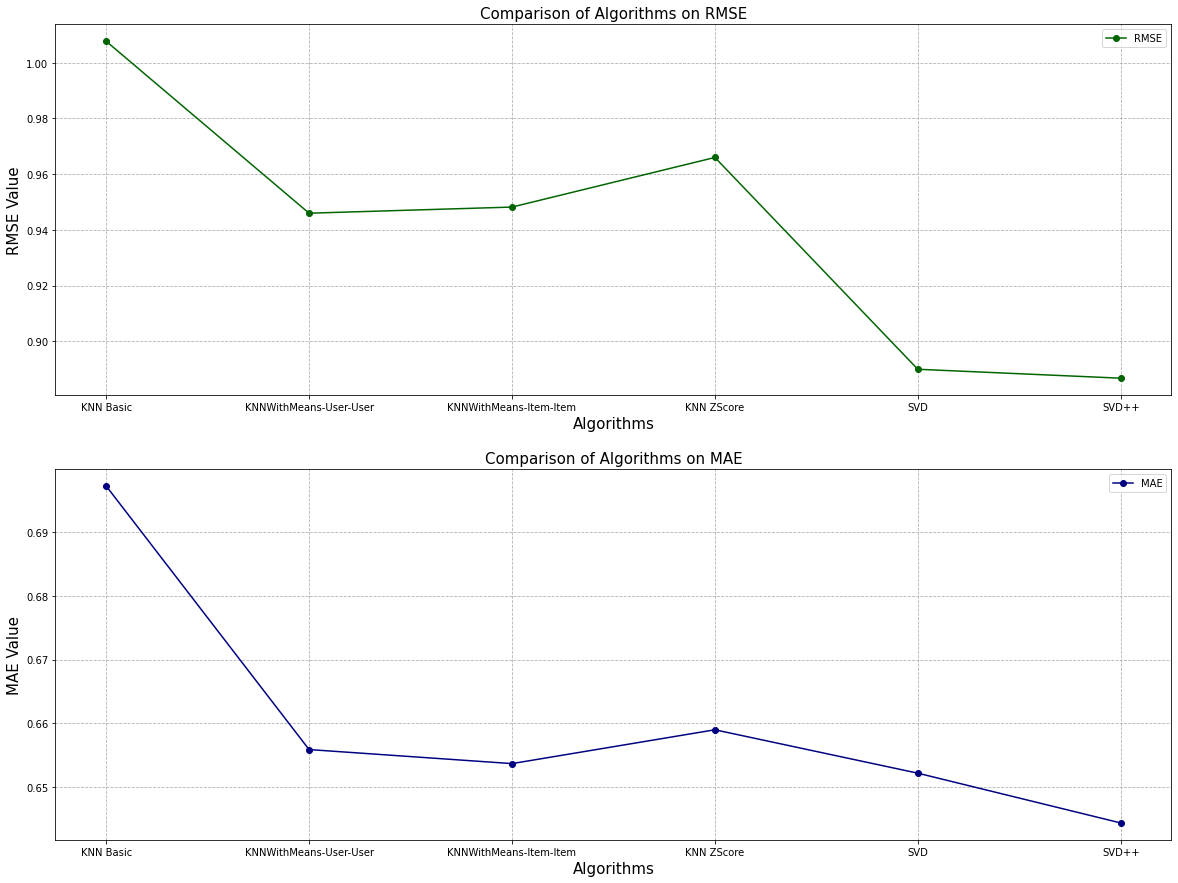

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.8900186,0.6521916,0.5305056,0.0190976
1,SVD++,0.8867699,0.6444038,3.8447493,0.1043778
2,KNNBasic,1.0076508,0.6971592,0.0968201,0.0740165
3,KNNWithZScore,0.9660434,0.6590307,0.1323882,0.0872754
4,KNNWithMeans User-User,0.9460204,0.6559093,0.1104329,0.0816797
5,KNNWithMeans Item-Item,0.9481773,0.6536871,0.1075038,0.0768918


In [ ]:
x_algo = ['KNN Basic', 'KNNWithMeans-User-User', 'KNNWithMeans-Item-Item', 'KNN ZScore', 'SVD', 'SVD++']
all_algos_cv = [knnBasic_cv, knnMeansUU_cv, knnMeansII_cv, knnZscore_cv, svd_cv, svdpp_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv  = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,15))

plt.subplot(2, 1, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(2, 1, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

cv_results


**MODEL EVALUATION:**

From above algorithm comparisons plots we can infer the followings:

1.   RMSE : we can see that SVD++ is giving the best RMSE values
2.   MAE : Here SVD++ and KNNWithMean-User-User both are giving the best MAE value
3.   SVD++ is showing the best RMSE in Matrix Factorization Based Algorithms.
4.   KNNWithMeans is giving the best RMSE in Collaborative Filtering Algorithms.
5.  If compare SVD and SVD++ then can notice that RMSE and MAE value of SVD is slightly differs from the SVD++ but the Fit Time and Test Time taken by SVD is significant less(12 times) than SVD++. So, we will proceed with SVD got get top-k recommendations


**MODEL DEPLOYMENT**

In [ ]:
top_n = defaultdict(list)
def get_top_n(predictions, n=k):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions_svd, n=k)
top_n

defaultdict(list,
            {'A100UD67AHFODS': [('B002Y6CJJ8', 4.950420659363509),
              ('B002HWRJY4', 4.8595121452143575),
              ('B0071BTJPI', 4.7678171033258225),
              ('B000LRMS66', 4.713019987979951),
              ('B000HZDF8W', 4.039676276324506)],
             'A100WO06OQR8BQ': [('B003ES5ZUU', 4.653192590867959),
              ('B001AW8W7A', 4.599249680262104),
              ('B001342KM8', 4.461274970803387),
              ('B00006BBAC', 4.37053417967114),
              ('B004CLYEH8', 4.3121662417151505)],
             'A105TOJ6LTVMBG': [('B000ENUCR4', 4.54871377174186),
              ('B006JINHYS', 4.27394262956261),
              ('B001F42MKG', 4.160521086935079)],
             'A10NMELR4KX0J6': [('B00483WRZ6', 4.320401764716978),
              ('B004LSNF04', 4.208885389524216),
              ('B000Q8UAWY', 4.0300253257128),
              ('B003VAM32E', 4.027487400435389)],
             'A10O7THJ2O20AG': [('B00017LSPI', 4.995755893082746),
        

**NOTE:**

The above list shows the model recommendations the "TOP 5" products for each user. There are some cases in which less than 5 products are recommended as the model is not able to find the appropriate number of neighbors

In [ ]:
def precision_recall_at_k(predictions, k=5, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


kf = KFold(n_splits=5)
svd_model = SVD(n_epochs=20, lr_all=0.005, reg_all=0.2)
precs = []
recalls = []

for trainset, testset in kf.split(surprise_data):
    svd_model.fit(trainset)
    predictions = svd_model.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.5)

    # Precision and recall can then be averaged over all users
    print('Precision : ', sum(prec for prec in precisions.values()) / len(precisions))
    print('Recalls : ',sum(rec for rec in recalls.values()) / len(recalls))


Precision :  0.863562559694366
Recalls :  0.9452921362305318


Precision :  0.8641885325558802
Recalls :  0.936979856877816


Precision :  0.8582844574780065
Recalls :  0.9281661683054644


Precision :  0.8535919540229894
Recalls :  0.9360725760510245


Precision :  0.8700098328416921
Recalls :  0.9425515200957679


In [ ]:
pickle.dump(svd_model,open('mostrelevant.pkl','wb'))

**Comment:** Precision and Recall have been calculated at k=5. 

 Precision and Recall are binary metrics used to evaluate models with binary output. We need a way to translate our numerical problem (ratings usually from 1 to 5) into a binary problem (relevant and not relevant items). To do the translation we assume that any true rating above 3.5 corresponds to a relevant item and any true rating below 3.5 is irrelevant.

Precision at 5 within the TOP 5 recommendations is alomost 85%. This means that 86% of the recommendation are relevent to the users.
Recall at 5 within the TOP 5 recommendations problem is almost 95%. This means that 95% of the total number of the relevent products appear in the top-k result.

**CONCLUSION**

- EDA shows us that most of the customers give a rating of "5". This leads us to the conclusion that customers are very satisfied with their purchase. It may need some investigation to see if some bots or mandatory feedback at lower ratings are causing the majority to give a top rating of "5"

- Subset of users who have provided 50 or more ratings and products which have received more than 10 ratings have been used to remove outliers and overcome Grey Sheep issue.

- Popularity Model - shows the TOP 5 recommended products irrespective of the user. The same 5 product will be recommended for every user.

- 'Matrix Factorization Based Algorithms' & 'k-NN Based Algorithms' were used to build Collaborative Filtering model.

- SVD++ yields the lowest RMSE which is slightly better than SVD but computational time of SVD++ is 12 times greater than SVD. SVD can be used to get the recommended products.

- Precision which is almost 86%. which can be interpreted as 86% of the recommendations are actually relevant to the user.

- Recall is at 96% which can be interpreted as percent of the relevant items were recommended in the top-k items.

In [ ]:
!pip install colabcode
!pip install fastapi

In [ ]:
from colabcode import ColabCode
from fastapi import FastAPI

In [ ]:
cc = ColabCode(port=12000, code=False)

In [ ]:
app = FastAPI()

@app.get("/")
async def read_root():
  return {"PRODUCT RECOMMENDER APP"}

In [ ]:
cc.run_app(app=app)

In [ ]:
%%writefile models.py
from pydantic import BaseModel, conlist
from typing import List

class electronics_data(BaseModel)
data: List[conlist(float, min_items=1, max_items=1)]

In [ ]:
import pickle
import logging
from fastapi import FastAPI

app = FastAPI(title="Model Deployment", description="Select your product", version="1.0")

# # Initialize logging
# my_logger = logging.getLogger()
# my_logger.setLevel(logging.DEBUG)
# logging.basicConfig(level=logging.DEBUG, filename='logs.log')

model = None

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("mostpopular.pkl", "rb"))

@app.post("/api", tags=["prediction"])
async def get_predictions(popularity_recommendations:electronics_data):
    try:
        data = dict(popularity_recommendations)['data']
        print(data)
        prediction = list(map(lambda x: popularity_recommendations_types[x], model.predict(data).tolist()))
        log_proba = model.predict_log_proba(data).tolist()
        return {"prediction": prediction, "log_proba": log_proba}

    except:
        my_logger.error("Something went wrong!")
        return {"prediction": "error"}